In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
# %matplotlib inline
%matplotlib notebook

In [ ]:
pre = "/Users/weilu/Research/server/oct_2017/23oct/"
perturbation_table = {0:"original", 1:"p_mem", 2:"m_mem", 3:"p_lipid", 4:"m_lipid"}
folder_list = [
   'memb_3_rg_0.1_lipid_1_extended',
    'memb_3_rg_0.1_lipid_1_topology'
]

temp_list = [450, 500, 550]
perturbation_list = [0, 1, 2, 3, 4]

In [115]:
import datetime

In [113]:
all_pmf_list = []
all_evpb_list = []
for folder in folder_list:
    for temp in temp_list:
        for perturbation in perturbation_list:
            
            # evpb
            if perturbation == 0:
                location = pre + "{}/1d_dis/t_all/force_0.0/evpb-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_dis/t_all/force_0.0/perturbation-{}-evpb-{}.dat".format(folder, perturbation, temp)

            name_list = ["Lipid", "Go", "Mem", "Rg"]
            names = ["bin", "x"] + name_list
            data = pd.read_table(location, skiprows=1, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_evpb_list.append(data)
            
            # pmf 
            if perturbation == 0:
                location = pre + "{}/1d_dis/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_dis/t_all/force_0.0/perturbation-{}-pmf-{}.dat".format(folder, perturbation, temp)

            name_list = ["f", "df", "e", "s"]
            names = ["bin", "x"] + name_list
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_pmf.feather")

data = pd.concat(all_evpb_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_evpb.feather")

In [114]:
all_pmf_list = []
all_evpb_list = []
for folder in folder_list:
    for temp in temp_list:
        for perturbation in perturbation_list:
            
            # evpb
            if perturbation == 0:
                location = pre + "{}/1d_qw/t_all/force_0.0/evpb-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_qw/t_all/force_0.0/perturbation-{}-evpb-{}.dat".format(folder, perturbation, temp)

            name_list = ["Lipid", "Go", "Mem", "Rg"]
            names = ["bin", "q"] + name_list
            data = pd.read_table(location, skiprows=1, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_evpb_list.append(data)
            
            # pmf 
            if perturbation == 0:
                location = pre + "{}/1d_qw/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_qw/t_all/force_0.0/perturbation-{}-pmf-{}.dat".format(folder, perturbation, temp)

            name_list = ["f", "df", "e", "s"]
            names = ["bin", "q"] + name_list
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

data = pd.concat(all_pmf_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_pmf_qw.feather")

data = pd.concat(all_evpb_list).dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_evpb_qw.feather")

In [77]:
pre = "/Users/weilu/Research/server/oct_2017/23oct/"
folder_list = [
   'memb_3_rg_0.1_lipid_1_extended',
    'memb_3_rg_0.1_lipid_1_topology'
]
all_data_list = []
temp_list = [450, 500, 550]
perturbation_list = [0, 1, 2, 3, 4]
for folder in folder_list:
    for temp in temp_list:
        for perturbation in perturbation_list:
            if perturbation == 0:
                location = pre + "{}/1d_dis/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            else:
                location = pre + \
                "{}/1d_dis/t_all/force_0.0/perturbation-{}-pmf-{}.dat".format(folder, perturbation, temp)
#         location = pre + "{}/1d_dis/t_all/force_0.0/pmf-{}.dat".format(folder, temp)
            name_list = ["f", "df", "e", "s"]
            names = ["bin", "x"] + name_list
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(folder=folder, temp=temp, perturbation=perturbation)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data = data.dropna().reset_index()
data.to_feather("/Users/weilu/Research/data/pulling/oct31_pmf.feather")

<IPython.core.display.Javascript object>


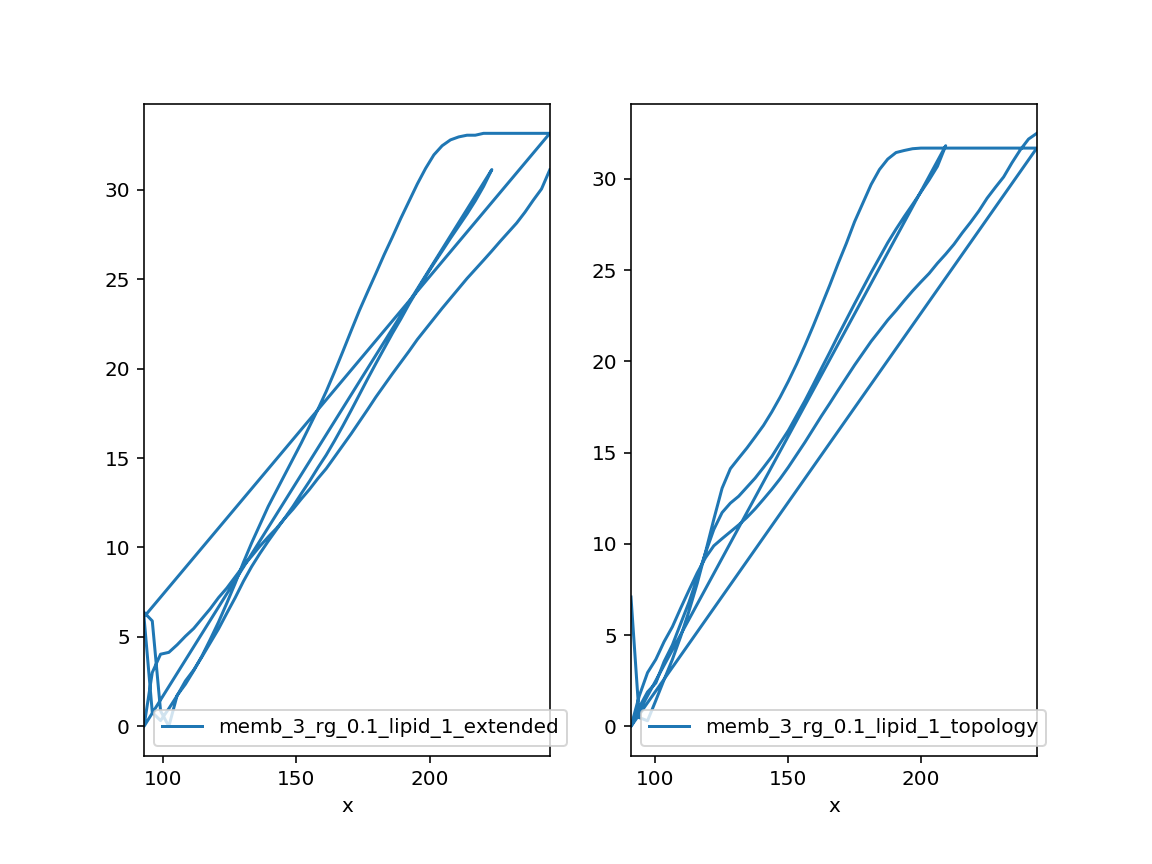

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
i = 0
for label, group in data.groupby('folder'):
#     processed_data = group - group.mean()
#     processed_data["x"] = data["x"]
    
    group.plot('x', "f", ax=axes[i], label=label)
    i = i + 1

In [86]:
pre = "/Users/weilu/Research/server/oct_2017/23oct/"
folder_list = [
   'memb_3_rg_0.1_lipid_1_extended',
    'memb_3_rg_0.1_lipid_1_topology'
]
all_data_list = []
for folder in folder_list:
    location = pre + "{}/1d_qw/t_all/force_0.0/evpb-500.dat".format(folder)
    name_list = ["Lipid", "Go", "Mem", "Rg"]
    names = ["bin", "x"] + name_list
    data = pd.read_table(location, skiprows=1, sep='\s+', names=names).assign(folder=folder)
    all_data_list.append(data)
data = pd.concat(all_data_list)
data = data.dropna()

<IPython.core.display.Javascript object>


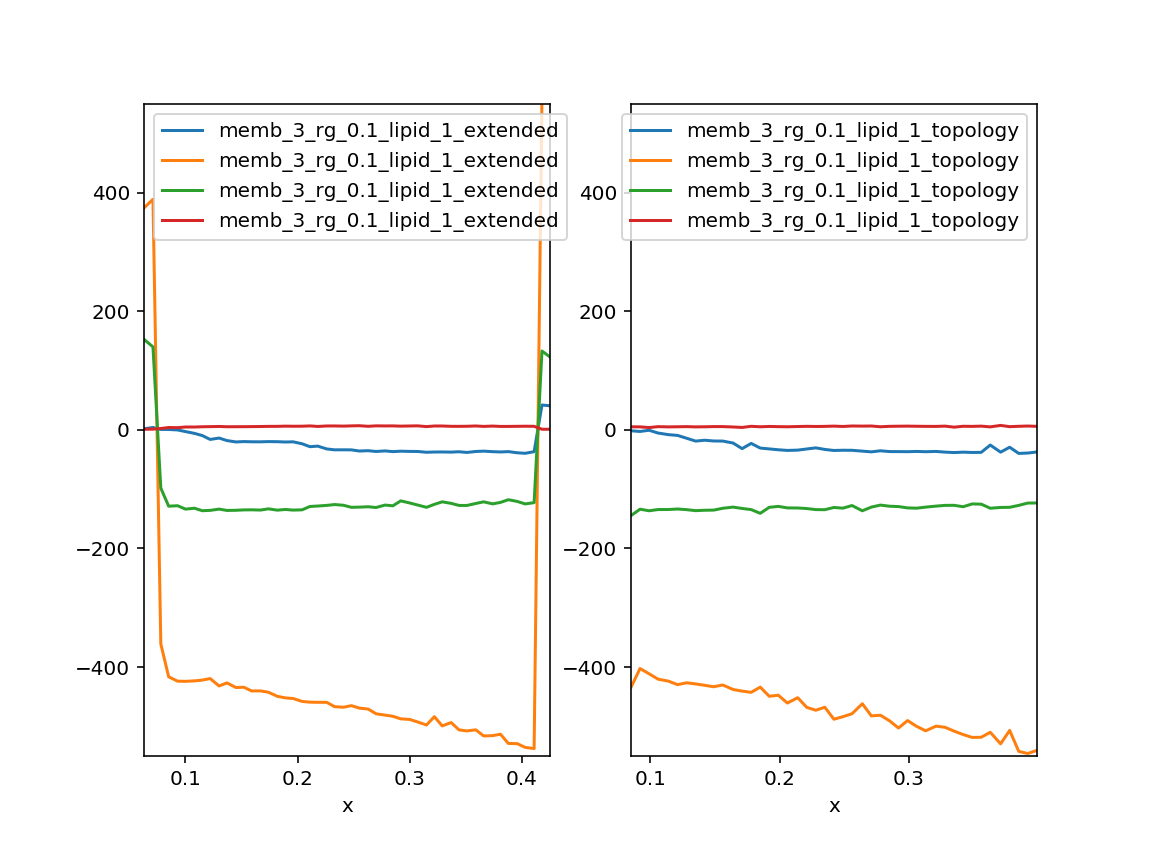

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
i = 0
for label, group in data.groupby('folder'):
#     processed_data = group - group.mean()
#     processed_data["x"] = data["x"]
    for name in name_list:
        group.plot('x', name, ax=axes[i], ylim=(-550,550), label=label)
    i = i + 1


In [ ]:
plotcontour.py pmf-400.dat -xmax 1 -xmin 0 -ymin 0 -ymax 150"

In [98]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28


In [99]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
arguments ={
    filename : location + "pmf-500.dat",
    x : 1,
    y : 2,
    z : 3,
    xmin, xmax : 0, 1,
    ymin, ymax : 0, 150,
    zmin, zmax : 0, 30,
    xlabel, ylabel : "xlabel", "ylabel",
    title : "title",
    titlefontsize : 28
}

SyntaxError: invalid syntax (<ipython-input-99-0e619d8b795c>, line 7)

In [100]:
def plot2d(**kargs):
    data = np.loadtxt(filename)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


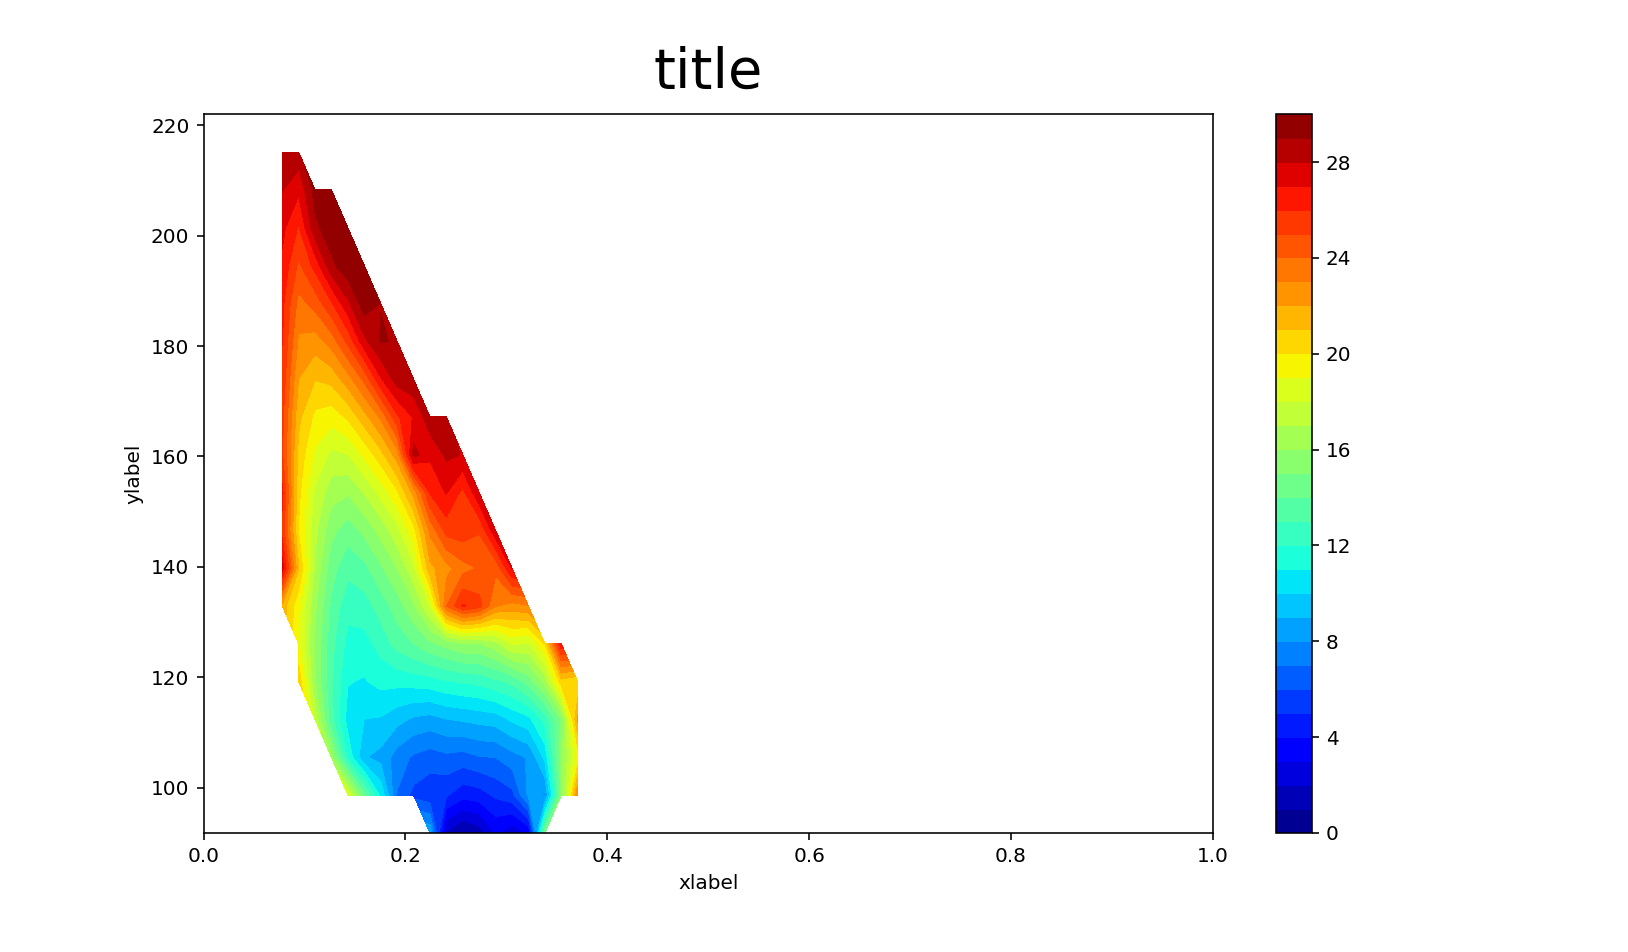

In [104]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-550.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
plot2d()

<IPython.core.display.Javascript object>


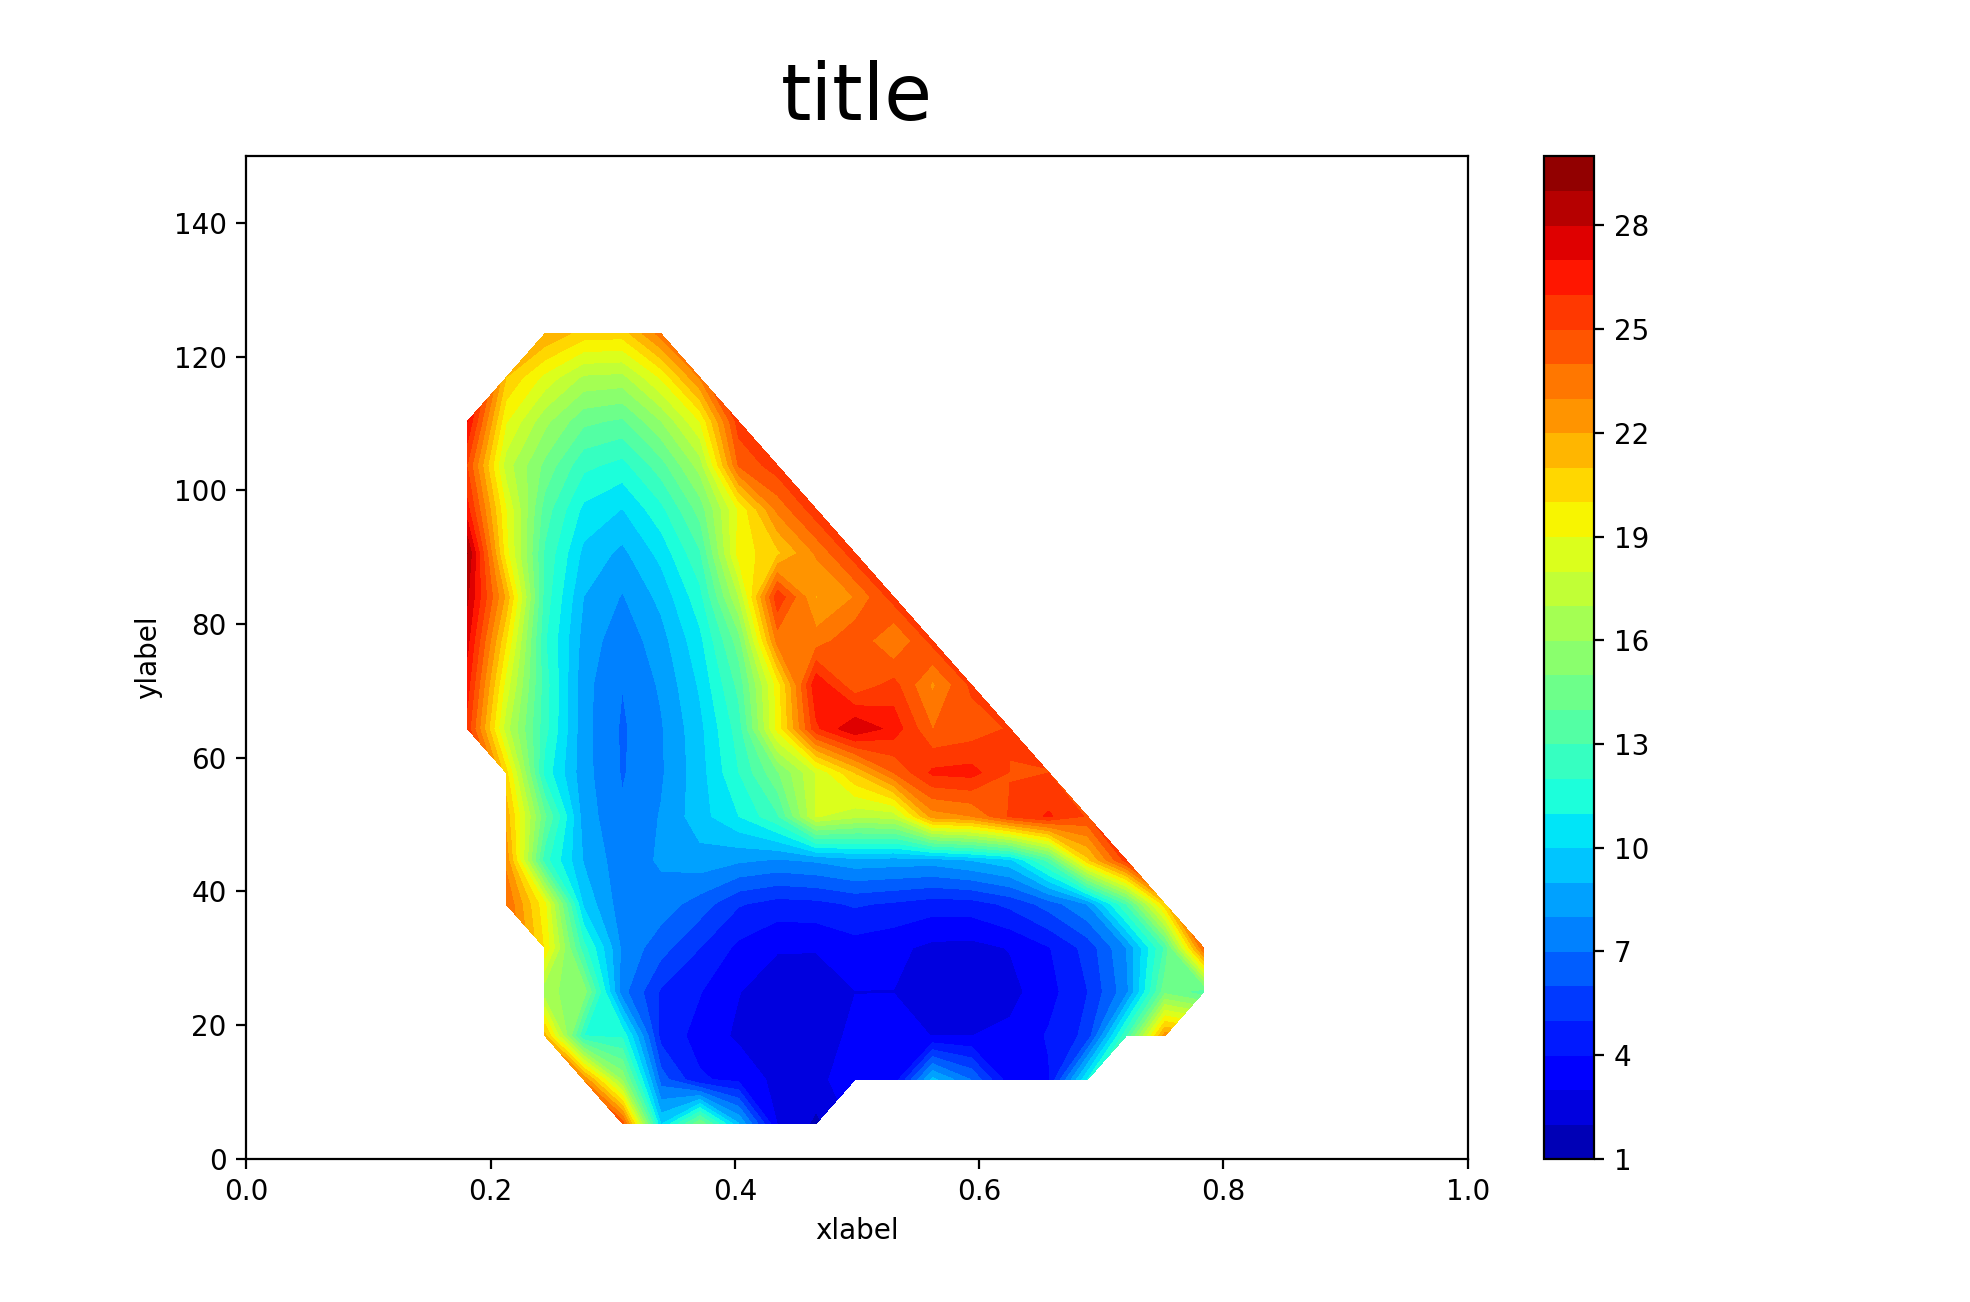

In [29]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
ma
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [14]:
%matplotlib notebook

In [28]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/2d_qw_dis/t_all/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/1d_dis/t_all/force_0.0"
file